In [50]:
# Setup.
import pandas as pd
import requests
import json
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import itertools 
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import matplotlib


In [51]:
def get_race_result(season_number, year ):
    api = 'http://ergast.com/api/f1/{}/{}/qualifying.json'.format(year, season_number)
    data = requests.get(api).json()
    temp_df =  pd.DataFrame.from_records(data.get('MRData').get('RaceTable').get('Races')[0].get('QualifyingResults'))
    temp_df['seasonNbr'] = season_number
    temp_df['year'] = year
    return temp_df

results = []
seasons = np.arange(2003,2018,1) #2018
rounds = np.arange(1,15,1) #15

for s in seasons:
    for r in rounds:
        result = get_race_result(r, s)
        results.append(result)

qualifying = pd.concat(results, axis=0)
qualifying['driver_id'] = qualifying.Driver.map(lambda x: x.get('driverId'))
qualifying['car_make'] = qualifying.Constructor.map(lambda x: x.get('name'))
qualifying['driver_nat'] = qualifying.Driver.map(lambda x: x.get('nationality'))

In [52]:
results = []
seasons = np.arange(2003,2018,1) #2018
rounds = np.arange(1,15,1) #15

for s in seasons:
    for r in rounds:
        result = get_race_result(r, s)
        results.append(result)

In [53]:
api = 'http://ergast.com/api/f1/2008/5/results.json'
resp = requests.get(api).json()

def get_race_result(season_number, year ):
    api = 'http://ergast.com/api/f1/{}/{}/results.json'.format(year, season_number)
    data = requests.get(api).json()
                                         #resp.get('MRData').get('RaceTable').get('Races')[0].get('Results')
    temp_df =  pd.DataFrame.from_records(data.get('MRData').get('RaceTable').get('Races')[0].get('Results'))
    circuit=data.get('MRData').get('RaceTable').get('Races')[0].get('Circuit')
    temp_df['circuit_name']=circuit.get('circuitName')
    temp_df['seasonNbr'] = season_number
    temp_df['year'] = year
    return temp_df

results = []
seasons = np.arange(2003,2018,1) #2018
rounds = np.arange(1,15,1) #15

for s in seasons:
    for r in rounds:
        result = get_race_result(r, s)
        results.append(result)

out = pd.concat(results, axis=0)
out['driver_id'] = out.Driver.map(lambda x: x.get('driverId'))
out['car_make'] = out.Constructor.map(lambda x: x.get('name'))
out['driver_nat'] = out.Driver.map(lambda x: x.get('nationality'))

results = out
results['points'] = results['points'].astype(float)

In [67]:
# Create combined dataframe of car make, year, position, qualifying counts and results counts.
# Summarize qualifying race results by car, year, and position.
qualifying_car_makes = qualifying.groupby(['car_make','year','position']).size().reset_index()
qualifying_car_makes.rename(columns={0:'qualifying_count'}, inplace = True)

# Summarize race results by car, year, and position.
results_car_makes = results.groupby(['car_make','year','position']).size().reset_index()
results_car_makes.rename(columns={0:'results_count'}, inplace = True)

# Combine the qualifying results counts and race results counts together.
car_make_df = pd.merge(qualifying_car_makes, results_car_makes, on = ['car_make','year','position'])
car_make_df['total_count'] = car_make_df['qualifying_count'] + car_make_df['results_count']

car_make_df.head()

,car_make,year,position,qualifying_count,results_count,total_count
0,BAR,2003,10,1,3,4
1,BAR,2003,12,4,2,6
2,BAR,2003,13,2,1,3
3,BAR,2003,14,3,1,4
4,BAR,2003,17,3,3,6


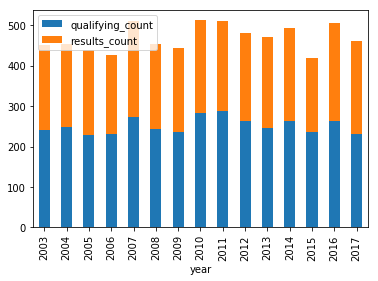

In [5]:
# Total number of positions awarded across races is between 400 and 500 every year.

x = car_make_df[['year','qualifying_count', 'results_count']]
y = x.set_index('year')
z = y.groupby('year').sum()

z.plot.bar(stacked=True)


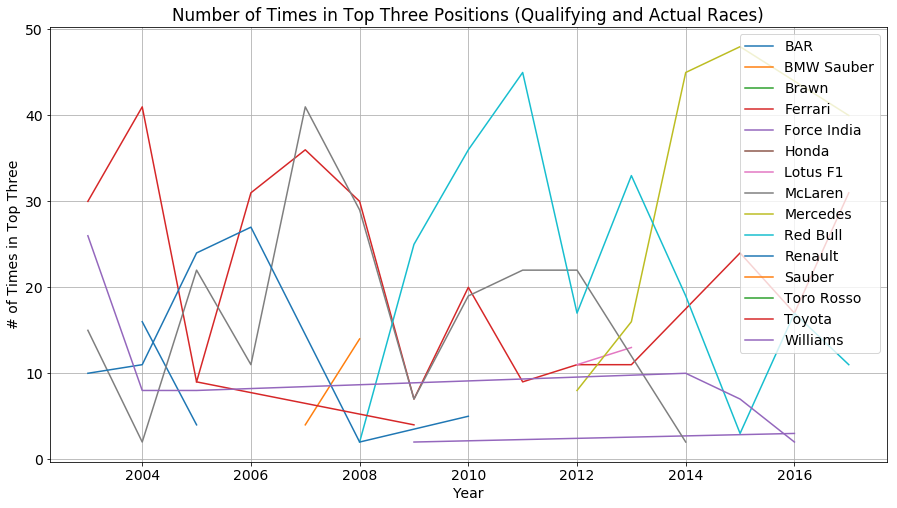

In [65]:
df = car_make_df[car_make_df['position'].isin(['1','2','3'])]
df = df[['car_make','year','total_count']].groupby(['car_make','year']).sum().reset_index()

matplotlib.rcParams.update({'font.size': 14})
plt.figure(figsize=(15,8))
for make in df["car_make"].unique():
    temp=df[df["car_make"]==make].sort_values("year",ascending=True)
    x=list(temp["year"])
    y=list(temp["total_count"])
    plt.plot(x,y,label=make)
plt.legend(loc=1)
plt.title("Number of Times in Top Three Positions (Qualifying and Actual Races)")
plt.xlabel('Year')
plt.ylabel('# of Times in Top Three')
plt.grid()
plt.show()


In [66]:
df2 = car_make_df[['car_make','results_count','position']].groupby(['car_make','position']).sum().reset_index()

In [68]:
def mult(row):
    return row["results_count"]*row[col]

df3 = pd.get_dummies(temp,columns=["car_make"])
df3 = df3.apply(pd.to_numeric)
# Why do the value change if I add this line: 
#df3 = df3.drop(['results_count'], axis=1)
#df3 = df3.loc[:, df3.columns != 'results_count')
df3.head()

,year,total_count,car_make_Williams
61,2003,26,1
62,2004,8,1
63,2005,8,1
64,2014,10,1
65,2015,7,1


Text(0,0.5,'# of Occurrences')

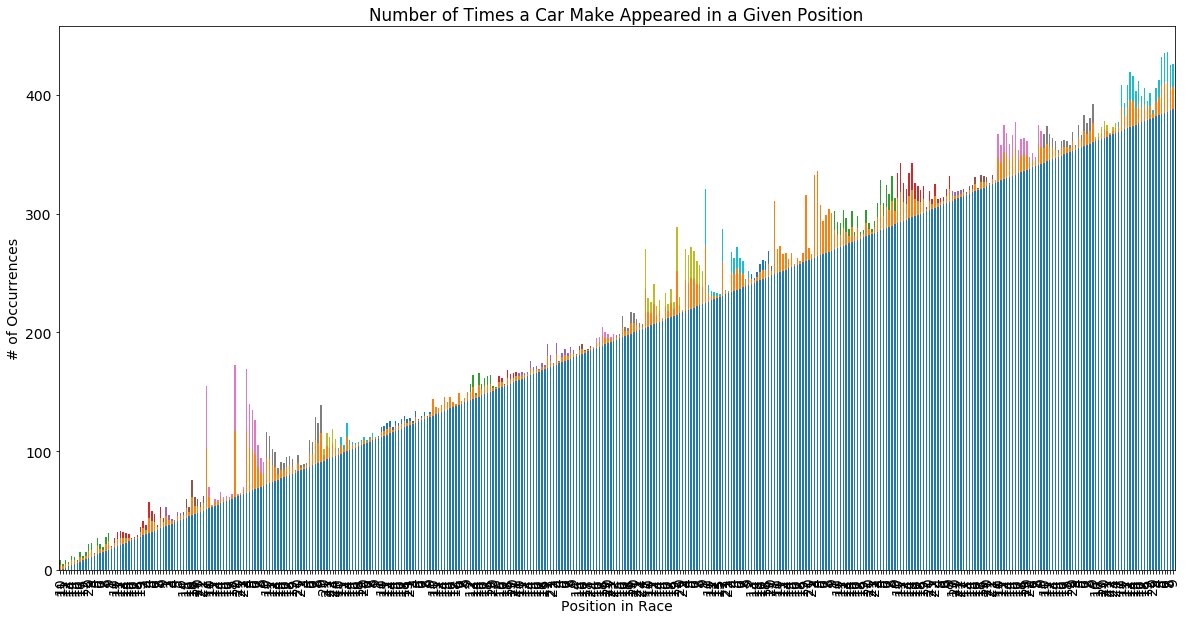

In [247]:
# neighborhood_desc = neighborhood_name.sort_values('total_crime_number', ascending=False)
# limited_desc_last_six = neighborhood_desc.set_index("NEIGHBORHOOD_ID")[-6:]
# limited_desc_last_six.columns=['drug','other','theft_burglary','traffic','violent',"total_crime_number"]
# # we had multilayer columns and then rename the columns to get selected inform we need 
# limited_desc_last_six = limited_desc_last_six[['drug','other','theft_burglary','traffic','violent']]
# # drop the totol_crime_number columns 
# limited_desc_last_six.plot.bar(stacked=True, figsize=(10,7))
# plt.title("Last 6 Neighborhoods Crime Information")
# # draw the stacked chart 
# limited_desc_last_six

df4 = df3.reset_index()
df4['position'] = df4['position'].astype(int)
#df4 = df4.sort_values('position', ascending=True) #This changes the values in the DF.
df4 = df4.rename(index=str, columns=
           {'car_make_BAR': 'BAR',
            'car_make_Caterham': 'Caterham',
            'car_make_HRT': 'HRT',
            'car_make_Jaguar': 'Jaguar',
            'car_make_LotusF1': 'LotusF1',
            'car_make_Marussia': 'Marussia',
            'car_make_Minardi': 'Minardi',
            'car_make_Sauber': 'Sauber',
            'car_make_ToroRosso': 'ToroRosso',
            'car_make_Williams': 'Williams',
            'car_make_BMWSauber': 'BMWSauber',
            'car_make_Ferrari': 'Ferrari',
            'car_make_HaasF1Team': 'HaasF1Team',
            'car_make_Jordan': 'Jordan',
            'car_make_MF1': 'MF1',
            'car_make_McLaren': 'McLaren',
            'car_make_RedBull': 'RedBull',
            'car_make_Spyker': 'Spyker',
            'car_make_Toyota': 'Toyota',
            'car_make_Brawn': 'Brawn',
            'car_make_ForceIndia': 'ForceIndia',
            'car_make_Honda': 'Honda',
            'car_make_Lotus': 'Lotus',
            'car_make_ManorMarussia': 'ManorMarussia',
            'car_make_Mercedes': 'Mercedes',
            'car_make_Renault': 'Renault',
            'car_make_SuperAguri': 'SuperAguri',
            'car_make_Virgin': 'Virgin',
            'car_make_BMW Sauber': 'BMW Sauber',
            'car_make_Force India': 'Force India',
            'car_make_Toro Rosso': 'Toro Rosso',
            'car_make_Super Aguri': 'Super Aguri',
            'car_make_Manor Marussia': 'Manor Marussia',
            'car_make_Red Bull': 'Red Bull',
            'car_make_Lotus F1': 'Lotus F1',
            'car_make_Haas F1 Team': 'F1 Team'})
df4 = df4.set_index('position')
df4.plot.bar(stacked=True,figsize=(20,10),legend=False)
plt.title("Number of Times a Car Make Appeared in a Given Position")
plt.xlabel('Position in Race')
plt.ylabel('# of Occurrences')

In [326]:
# Create combined dataframe of car make, year, position, qualifying counts and results counts.

# Summarize qualifying race results by car, year, and position.
qualifying_car_makes = qualifying.groupby(['car_make','year','position']).size().reset_index()
qualifying_car_makes.rename(columns={0:'qualifying_count'}, inplace = True)

# Summarize race results by car, year, and position.
results_car_makes = results.groupby(['car_make','year','position']).size().reset_index()
results_car_makes.rename(columns={0:'results_count'}, inplace = True)

# Combine the qualifying results counts and race results counts together.
car_make_df = pd.merge(qualifying_car_makes, results_car_makes, on = ['car_make','year','position'])
car_make_df['total_count'] = car_make_df['qualifying_count'] + car_make_df['results_count']

# Subset the original dataframe to see only car make, result count, and position.
# Show one row per car make / position.
df2 = car_make_df[['car_make','results_count','position']].groupby(['car_make','position']).sum().reset_index() 

# Convert every car make from a row in the dataframe to a column.
df3 = pd.get_dummies(df2,columns=["car_make"])
df3[df3['position'] == '3']

,position,results_count,car_make_BAR,car_make_BMW Sauber,car_make_Brawn,car_make_Caterham,car_make_Ferrari,car_make_Force India,car_make_HRT,car_make_Haas F1 Team,...,car_make_Minardi,car_make_Red Bull,car_make_Renault,car_make_Sauber,car_make_Spyker,car_make_Super Aguri,car_make_Toro Rosso,car_make_Toyota,car_make_Virgin,car_make_Williams
11,3,6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,3,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,3,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65,3,52,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85,3,2,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
123,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,3,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218,3,26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
234,3,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,3,35,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [325]:
df2[df2['position'] == '3']

,car_make,position,results_count
11,BAR,3,6
30,BMW Sauber,3,4
39,Brawn,3,2
65,Ferrari,3,52
85,Force India,3,2
123,Honda,3,1
173,Lotus F1,3,9
218,McLaren,3,26
234,Mercedes,3,17
263,Red Bull,3,35


In [318]:
# Set up a function that will allow me to multiply the value in each car make column
# By the results_counts.
def mult(row):
    row["results_count"] * row[col]
    
df3 = ''  

# Apply the function to multiple the results counts by the number of times
# That car make had those results for that position.
for col in list(df3.columns)[2:]:
    df3[col] = df3.apply(mult,axis=1)

df3.head()

,position,results_count,car_make_BAR,car_make_BMW Sauber,car_make_Brawn,car_make_Caterham,car_make_Ferrari,car_make_Force India,car_make_HRT,car_make_Haas F1 Team,...,car_make_Minardi,car_make_Red Bull,car_make_Renault,car_make_Sauber,car_make_Spyker,car_make_Super Aguri,car_make_Toro Rosso,car_make_Toyota,car_make_Virgin,car_make_Williams
0,10,4,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,11,2,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,12,3,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,13,2,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,14,4,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
